In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
zip_path = '/content/drive/MyDrive/aloe_dataset_2.zip'
!unzip -q "$zip_path" -d ./dataset

In [3]:
import os
for root, dirs, files in os.walk("./dataset"):
    print(root)

./dataset
./dataset/aloe_dataset
./dataset/aloe_dataset/test
./dataset/aloe_dataset/test/Sunburn
./dataset/aloe_dataset/test/Aloe Rust
./dataset/aloe_dataset/test/Healthy
./dataset/aloe_dataset/test/Leaf spot
./dataset/aloe_dataset/test/Anthracnose
./dataset/aloe_dataset/train
./dataset/aloe_dataset/train/Sunburn
./dataset/aloe_dataset/train/Aloe Rust
./dataset/aloe_dataset/train/Healthy
./dataset/aloe_dataset/train/Leaf spot
./dataset/aloe_dataset/train/Anthracnose


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Check GPU
print("GPU Available:", tf.config.list_physical_devices('GPU'))


GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [5]:
IMG_SIZE = 224
BATCH_SIZE = 32

train_dir = './dataset/aloe_dataset/train'
test_dir = './dataset/aloe_dataset/test'


In [6]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 2261 images belonging to 5 classes.
Found 1261 images belonging to 5 classes.


In [7]:
base_model = MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3),
                         include_top=False,
                         weights='imagenet')
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,597 (9.24 MB)

 Trainable params: 164,613 (643.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [8]:
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=25
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - accuracy: 0.3561 - loss: 1.5813 - val_accuracy: 0.5884 - val_loss: 1.0567
Epoch 2/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.5602 - loss: 1.0998 - val_accuracy: 0.6875 - val_loss: 0.8529
Epoch 3/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.6294 - loss: 0.9586 - val_accuracy: 0.7010 - val_loss: 0.7802
Epoch 4/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.6606 - loss: 0.8687 - val_accuracy: 0.7589 - val_loss: 0.7256
Epoch 5/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.6888 - loss: 0.8146 - val_accuracy: 0.7716 - val_loss: 0.6673
Epoch 6/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.7261 - loss: 0.7357 - val_accuracy: 0.7637 - val_loss: 0.6470
Epoch 7/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.7298 - loss: 0.6848 - val_accuracy: 0.8089 - val_loss: 0.5645
Epoch 8/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.7680 - loss: 0.6377 - val_accuracy: 0.8263 - val_loss

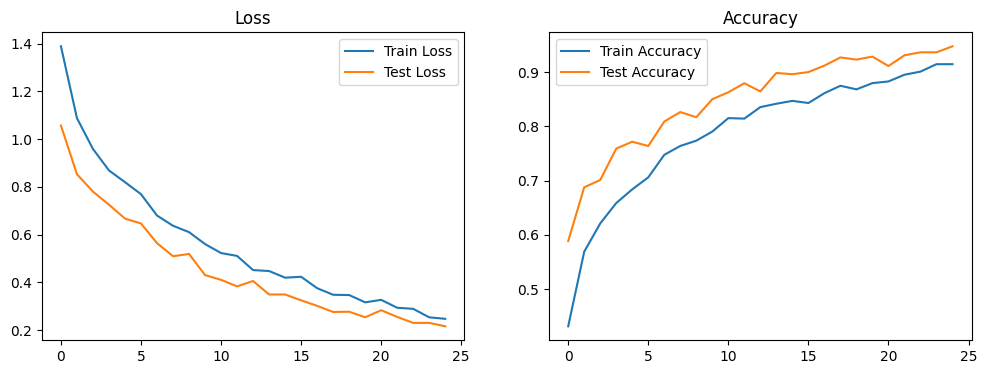

In [9]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy')
plt.legend()

plt.show()


In [10]:
# Save in Colab temporary storage
model.save("aloe_model.keras")

# OR save to Google Drive (recommended for safety)
from google.colab import drive
drive.mount('/content/drive')
model.save("/content/drive/MyDrive/aloe_model.keras")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
model.save("/content/drive/MyDrive/aloe_model.keras")
